In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. **Import** **and analyse the data set**


In [3]:
data1 = pd.read_csv("/content/drive/My Drive/Copy of Dataset - blogtext.csv")


In [4]:
data1.shape

(681284, 7)

Since the data size is huge, taking a sample of the data to process.

In [5]:
data = data1.iloc[0:8000]

In [6]:
data.head

<bound method NDFrame.head of            id  ...                                               text
0     2059027  ...             Info has been found (+/- 100 pages,...
1     2059027  ...             These are the team members:   Drewe...
2     2059027  ...             In het kader van kernfusie op aarde...
3     2059027  ...                   testing!!!  testing!!!          
4     3581210  ...               Thanks to Yahoo!'s Toolbar I can ...
...       ...  ...                                                ...
7995  2635745  ...         Today was good for me!  I had an excell...
7996  2635745  ...         OH MY GOODNESS!  OH MY GOODNESS!  OH MY...
7997  2635745  ...         Well, my day was...okay, average, long,...
7998  2635745  ...         Sorry for the title.  It was more like ...
7999  2635745  ...         READY FOR LOVE: You're sensitive but no...

[8000 rows x 7 columns]>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8000 non-null   int64 
 1   gender  8000 non-null   object
 2   age     8000 non-null   int64 
 3   topic   8000 non-null   object
 4   sign    8000 non-null   object
 5   date    8000 non-null   object
 6   text    8000 non-null   object
dtypes: int64(2), object(5)
memory usage: 437.6+ KB


In [8]:
data.drop(labels=['id','date'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data.tail(5)

,gender,age,topic,sign,text
7995,female,15,Student,Pisces,Today was good for me! I had an excell...
7996,female,15,Student,Pisces,OH MY GOODNESS! OH MY GOODNESS! OH MY...
7997,female,15,Student,Pisces,"Well, my day was...okay, average, long,..."
7998,female,15,Student,Pisces,Sorry for the title. It was more like ...
7999,female,15,Student,Pisces,READY FOR LOVE: You're sensitive but no...


2.**Perform data pre-processing on the data:**
Data cleansing by removing unwanted characters, spaces, stop words etc.    Convert text to lowercase.
Target/label merger and transformation
Train and test split
Vectorisation, etc

In [10]:
df = data[["text"]]
df[:5]

,text
0,"Info has been found (+/- 100 pages,..."
1,These are the team members: Drewe...
2,In het kader van kernfusie op aarde...
3,testing!!! testing!!!
4,Thanks to Yahoo!'s Toolbar I can ...


In [11]:
pd.options.mode.chained_assignment = None
df['text'] = df[['text']]
df["text"] = df["text"].astype(str)

**Converting to lower case**

In [12]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,..."
1,These are the team members: Drewe...,these are the team members: drewe...
2,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,testing!!! testing!!!,testing!!! testing!!!
4,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...


**Removing Punctuation**

In [13]:
from nltk.stem.snowball import SnowballStemmer
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))
                                        
df["text_wo_punctuation"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_lower,text_wo_punctuation
0,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,...",info has been found 100 pages and ...
1,These are the team members: Drewe...,these are the team members: drewe...,these are the team members drewes...
2,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,testing!!! testing!!!,testing!!! testing!!!,testing testing
4,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...,thanks to yahoos toolbar i can no...


**Finding Stop Words and Removing them.**

In [14]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [15]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punctuation"].apply(lambda text : remove_stopwords(text))
df.head()

,text,text_lower,text_wo_punctuation,text_wo_stop
0,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,...",info has been found 100 pages and ...,info found 100 pages 45 mb pdf files wait unti...
1,These are the team members: Drewe...,these are the team members: drewe...,these are the team members drewes...,team members drewes van der laag urllink mail ...
2,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,testing!!! testing!!!,testing!!! testing!!!,testing testing,testing testing
4,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...,thanks to yahoos toolbar i can no...,thanks yahoos toolbar capture urls popupswhich...


In [16]:
def clean_text(text):
    text = text.strip()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = text.lower()
    return text
data["text"] = data["text"].map(lambda text : clean_text(text))

In [17]:
data.head(5)

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files now wait ...
1,male,15,Student,Leo,these team members drewes van der laag urllink...
2,male,15,Student,Leo,in het kader van kernfusie op aarde maak je ei...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar i capture urls popupswhi...


In [18]:
pd.set_option('display.max_colwidth', 50)
data.head(5).T

,0,1,2,3,4
gender,male,male,male,male,male
age,15,15,15,15,33
topic,Student,Student,Student,Student,InvestmentBanking
sign,Leo,Leo,Leo,Leo,Aquarius
text,info found 100 pages 45 mb pdf files now wait ...,these team members drewes van der laag urllink...,in het kader van kernfusie op aarde maak je ei...,testing testing,thanks yahoos toolbar i capture urls popupswhi...


**Exploratory Data Analysis**

In [19]:
data.isnull().any().any()

False

In [20]:
data.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,8000.0,29.67125,7.789111,13.0,24.0,35.0,35.0,46.0


In [21]:
print(data.age.value_counts())

35    2311
36    1703
17     914
27     691
34     540
15     390
24     378
25     268
14     170
23     144
26     112
33     101
39      79
16      73
38      46
37      19
41      14
42      14
45      14
13       9
46       7
44       3
Name: age, dtype: int64


In [22]:
data.describe(include = [np.object]).T

,count,unique,top,freq
gender,8000,2,male,4939
topic,8000,21,indUnk,2616
sign,8000,12,Aries,4140
text,8000,7938,,35


**Categotical Columns are "Gender" , "Topic" , "Sign". Let's see the distribution of these categorical columns.**

In [23]:
male = data.loc[data['gender'] == 'male']
female = data.loc[data['gender'] == 'female']
print(male.shape)
print(female.shape)

(4939, 5)
(3061, 5)


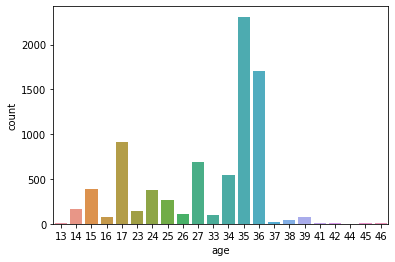

In [24]:
sns.countplot(x="age", data=data)

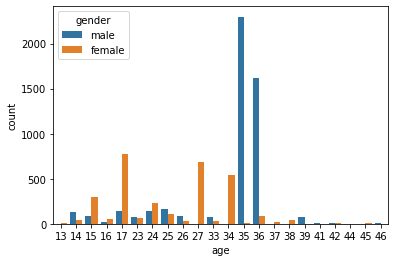

In [25]:
sns.countplot(x="age", hue="gender", data=data)

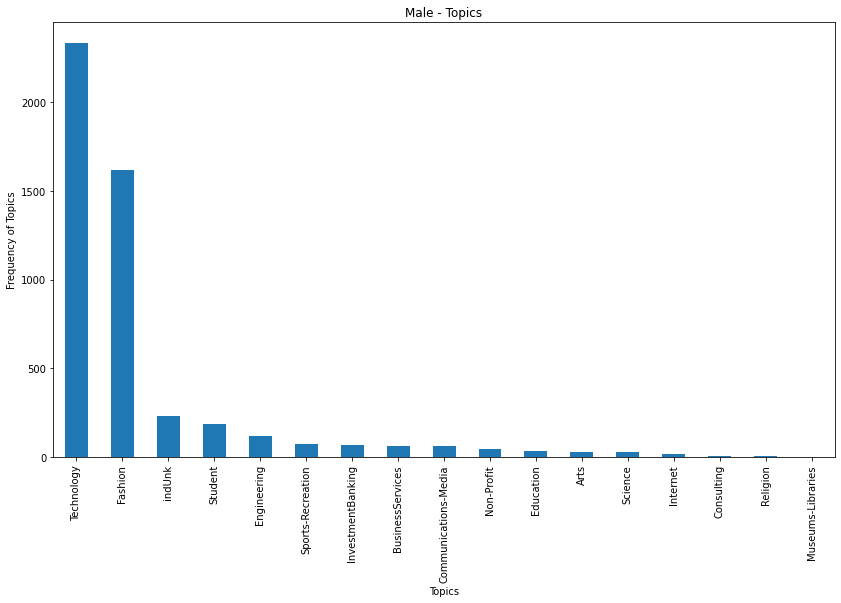

In [26]:

import matplotlib.pyplot as plt

ax = male['topic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Male - Topics")
ax.set_xlabel("Topics")
ax.set_ylabel("Frequency of Topics")
plt.show()



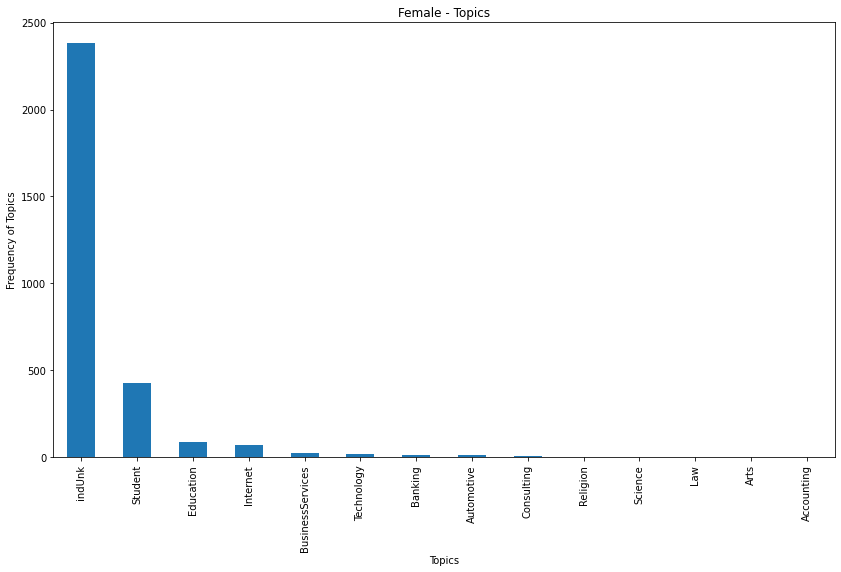

In [27]:
ax = female['topic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Female - Topics")
ax.set_xlabel("Topics")
ax.set_ylabel("Frequency of Topics")
plt.show()

**Target/label merger and transformation**

Columns to merge : ["gender", "age", "topic", "sign"]


In [28]:
data["age"] = data["age"].astype(str)
data["labels"] = data.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)
data.drop(columns=["gender","age","sign","topic"],axis =1, inplace = True)
data.head(5)

,text,labels
0,info found 100 pages 45 mb pdf files now wait ...,"[male, 15, Student, Leo]"
1,these team members drewes van der laag urllink...,"[male, 15, Student, Leo]"
2,in het kader van kernfusie op aarde maak je ei...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar i capture urls popupswhi...,"[male, 33, InvestmentBanking, Aquarius]"


**Spliting Train and Test**

In [29]:
X = data.text
y = data.labels

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42,
                                                   test_size = 0.1,
                                                  shuffle = True)

In [30]:
print("shape of training set :", X_train.shape)
print("shape of test set :", X_test.shape)

shape of training set : (7200,)
shape of test set : (800,)


**Vectorization**

Count Vectorization


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')

corpus = list(X_train)+list(X_test)

In [32]:
ctv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

Transforming X_test and X_train

In [33]:
xtrain_ctv = ctv.transform(X_train)
xtest_ctv = ctv.transform(X_test)
print(len(ctv.vocabulary_))

987543


In [34]:
ctv.get_feature_names()[:20]

['0',
 '0 23003',
 '0 23003 64121',
 '0 answering',
 '0 answering machine',
 '0 article',
 '0 article vieques',
 '0 bb',
 '0 bb 4',
 '0 bb 6',
 '0 breaking',
 '0 breaking cycle',
 '0 cakes',
 '0 cakes past',
 '0 comments',
 '0 comments thing',
 '0 er',
 '0 er 1st',
 '0 er 3',
 '0 er 5']

TF-IDF (Term Frequency - Inverse Document Frequency)

In [35]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
           strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
          ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
          stop_words = 'english')
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xvalid_tfv = tfv.transform(X_test)

In [36]:
tfv.get_feature_names()[:20]

['0',
 '0 er',
 '002',
 '007',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '1',
 '1 12',
 '1 2',
 '1 2 3',
 '1 5',
 '1 bb',
 '1 biggest',
 '1 biggest accomplishment',
 '1 chance',
 '1 chance meet']

Dictionary to get the count of every label

In [37]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts

{'13': 9,
 '14': 170,
 '15': 390,
 '16': 73,
 '17': 914,
 '23': 144,
 '24': 378,
 '25': 268,
 '26': 112,
 '27': 691,
 '33': 101,
 '34': 540,
 '35': 2311,
 '36': 1703,
 '37': 19,
 '38': 46,
 '39': 79,
 '41': 14,
 '42': 14,
 '44': 3,
 '45': 14,
 '46': 7,
 'Accounting': 2,
 'Aquarius': 351,
 'Aries': 4140,
 'Arts': 31,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 87,
 'Cancer': 238,
 'Capricorn': 88,
 'Communications-Media': 61,
 'Consulting': 18,
 'Education': 121,
 'Engineering': 119,
 'Fashion': 1616,
 'Gemini': 88,
 'Internet': 93,
 'InvestmentBanking': 70,
 'Law': 3,
 'Leo': 208,
 'Libra': 425,
 'Museums-Libraries': 2,
 'Non-Profit': 47,
 'Pisces': 103,
 'Religion': 9,
 'Sagittarius': 755,
 'Science': 33,
 'Scorpio': 854,
 'Sports-Recreation': 77,
 'Student': 615,
 'Taurus': 709,
 'Technology': 2350,
 'Virgo': 41,
 'female': 3061,
 'indUnk': 2616,
 'male': 4939}

**3. . Design, train, tune and test the best text classifier**

For multilabel binary output, we need to convert the train and test labels using MultiLabelBinarizer.

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [39]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline.fit(xtrain_ctv, y_train)

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtest_ctv)

In [42]:
display_metrics_micro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.225
F1 score: Micro 0.5845974329054843
Average precision score: Micro 0.4007269166576327
Average recall score: Micro 0.4696875


In [43]:
display_metrics_macro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.225
F1 score: Macro 0.1658945419394342
Average recall score: MAcro 0.12759636451777367


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
display_metrics_weighted(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.225
F1 score: weighted 0.5383989559726673
Average precision score: weighted 0.486729429916435
Average recall score: weighted 0.4696875


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Print the true vs predicted labels for any 5 entries from the dataset.**

In [45]:
import random 

def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])

In [46]:
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_test, n= 10)

[490, 739, 91, 482, 550, 15, 185, 531, 575, 669]
('15', '25', 'Aquarius', 'Libra', 'Non-Profit', 'Student', 'female', 'indUnk')
('25', 'Cancer', 'Non-Profit', 'male')
('Aries', 'male')
('35', 'Aries', 'Technology', 'male')
('34', 'Sagittarius', 'female', 'indUnk')
('34', 'Sagittarius', 'female', 'indUnk')
('Aries', 'male')
('27', 'Taurus', 'female', 'indUnk')
('36', 'Aries', 'Fashion', 'male')
('36', 'Aries', 'Fashion', 'male')
('34', 'Sagittarius', 'female', 'indUnk')
('34', 'Sagittarius', 'female', 'indUnk')
('male',)
('17', 'Scorpio', 'female', 'indUnk')
('36', 'Aries', 'Fashion', 'male')
('36', 'Aries', 'Fashion', 'male')
('27', 'Taurus', 'female', 'indUnk')
('27', 'Taurus', 'female', 'indUnk')
('male',)
('27', 'Taurus', 'female', 'indUnk')
